<a href="https://colab.research.google.com/github/kadamvd/data-cereries/blob/master/LAO_BAND_M_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BAND visualization (Math)**
 (1) install and load packages

 (2) Data upload (Download Data: https://docs.google.com/spreadsheets/d/1Y3u7kXI6vPs8gzZvUOMHm-GMCk_aicdK/edit?usp=sharing&ouid=110404411823733054417&rtpof=true&sd=true)

 (3) Data open

 (4) Exploring data structures

 (5) Select variable(Math band)

 (6) Data pre-processing

 (7) Visualization

In [2]:
# (1) install and load packages
install.packages("descr")
library(descr)
library(readxl)
library(dplyr)
library(tibble)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# (2) Data upload - Drag & Drop the downloaded data into the file field

# (3) Data open
data <- read_excel("/content/LAO_BAND.xlsx")

In [4]:
# (4) Exploring data structures
head(data)

Fullid,S_GENDER,PL_PV1_M,PL_PV1_R,PL_PV1_W
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
LAO0100101001,1,5,3,1
LAO0100101002,1,2,2,1
LAO0100101003,1,2,3,0
LAO0100101004,1,4,3,2
LAO0100101005,1,4,2,1
LAO0100101006,1,6,4,2


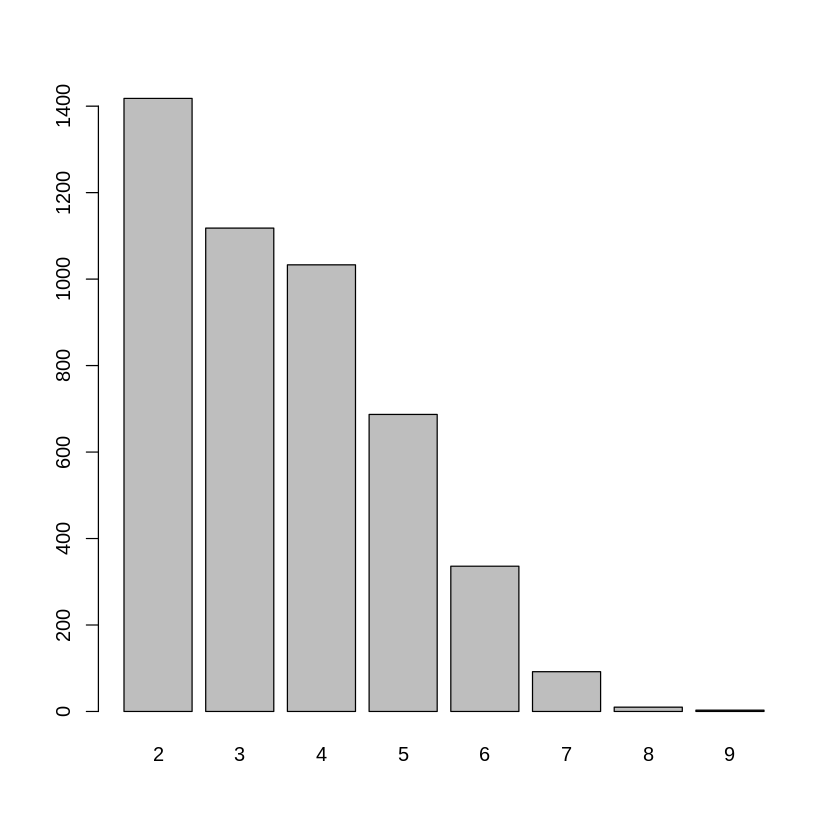

In [7]:
# (5) Select variable(Math band)
math <- freq(data$PL_PV1_M)

In [8]:
math

,Frequency,Percent
2,1418,30.18948265
3,1118,23.80242708
4,1033,21.99276134
5,687,14.62635725
6,336,7.15350224
7,92,1.95869704
8,10,0.21290185
9,3,0.06387056
Total,4697,100.00000000


In [9]:
# (6) Data pre-processing
#delete row "Total"
math <- math[!(row.names(math) %in% "Total"),]

In [10]:
#convert to dataframe
math <- data.frame(math)

In [11]:
#rowname to column
math <- rownames_to_column(math)

In [12]:
#limiting decimals
math$Percent <- round(math$Percent, 1)

In [ ]:
#limiting decimals
math$Percent <- round(, 1)

In [13]:
# reorder rows
math$rowname <- factor(math$rowname, levels=c('6', '5', '4', '3', '2'))

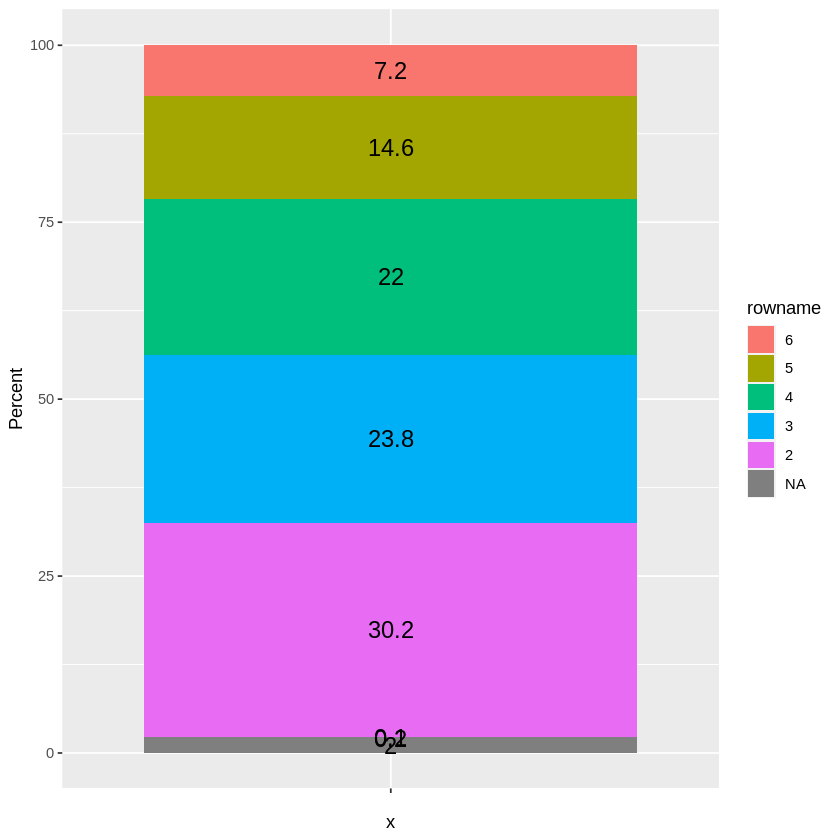

In [15]:
# (7) Visualization
ggplot(math, aes(x = "", y = Percent, fill=rowname, label = Percent  )) +
       geom_bar(stat="identity") +
       geom_text(size=5, position = position_stack(vjust = 0.5))